In [1]:
import numpy as np # array operations
import cv2 #opencv library read img operations
# 產生 random seed
import random
import math
# data visualisation and manipulation
import matplotlib.pyplot as plt #show img and table

In [2]:
# 加密
def embedding(n:int, digit_ary:int, cover_img:np.ndarray, secret_digit:int):
    #digit_ary=2*n+1
    f=0
    for i in range(n):
        f+=cover_img[i]*(i+1)
    f=f % digit_ary
    s=(secret_digit-f) % digit_ary
    if(s!=0):#s=0 不用變動
        if(s<=n):
            cover_img[s-1]=cover_img[s-1]+1
            if(cover_img[s-1]>255 or cover_img[s-1]<0):
                if(cover_img[s-1]>255):
                    cover_img[s-1]=cover_img[s-1]-2
                else:
                    cover_img[s-1]=cover_img[s-1]+2
                embedding(n=n,digit_ary=digit_ary,cover_img=cover_img,secret_digit=secret_digit)
        else:
            change_index=digit_ary-s-1
            cover_img[change_index]=cover_img[change_index]-1
            if(cover_img[change_index]>255 or cover_img[change_index]<0):
                if(cover_img[change_index]>255):
                    cover_img[change_index]=cover_img[change_index]-2
                else:
                    cover_img[change_index]=cover_img[change_index]+2
                embedding(n=n,digit_ary=digit_ary,cover_img=cover_img,secret_digit=secret_digit)
        
    return cover_img
# embedding(n=4,digit_ary=9,cover_img=[14,13,9,4],secret_digit=7)

In [3]:
# 解密
def extraction(n:int, digit_ary:int, cover_img:np.ndarray):
    f=0
    for i in range(n):
        f+=cover_img[i]*(i+1)
    secret_digit=f % digit_ary
    return secret_digit
# extraction(n=4, digit_ary=9,cover_img=[14, 13, 9, 3])

In [4]:
# 輸出密碼 secret digit
def output_secret_txt(secret_digit:np.ndarray, L:int):
    path = 'secret_digit2.txt'
    f = open(path, 'w', encoding="utf-8")
    temp=" "
    for i in range(len(secret_digit)):
        temp+=str(secret_digit[i])
        if((i+1) % L==0):
#             print("temp",temp)
            f.write(temp+'\n')
#             f.write('{:s}'.format(temp))
            temp=" "
    f.close()

In [5]:
def output_secret_txt2(secret_digit:np.ndarray):
    path = 'secret_digit3.txt'
    f = open(path, 'w', encoding="utf-8")
    for i in range(len(secret_digit)):
        f.write(str('{}{:d}'.format(" ",secret_digit[i])))
    f.close()

[numpy reverse](https://blog.csdn.net/weixin_42200930/article/details/109133980?spm=1001.2101.3001.6661.1&utm_medium=distribute.pc_relevant_t0.none-task-blog-2%7Edefault%7ECTRLIST%7ERate-1-109133980-blog-82261651.pc_relevant_multi_platform_whitelistv3&depth_1-utm_source=distribute.pc_relevant_t0.none-task-blog-2%7Edefault%7ECTRLIST%7ERate-1-109133980-blog-82261651.pc_relevant_multi_platform_whitelistv3&utm_relevant_index=1)

In [6]:
def binary_to_digitArr(secret_digit:np.ndarray, k:int, digit_ary:int):
    # 2進位 轉 10進位
    dec_num=0
    # 將 secret_digit 倒過來轉 也可用 secret_digit[::-1]
    reversed_arr = np.flip(secret_digit)
#     print("reversed_arr",reversed_arr)
    for i in range(len(secret_digit)):
        if(reversed_arr[i]==1):
            dec_num+=math.pow(2,i)
            
    # 10進位 轉 digit_ary(2*n+1)
    temp=[]
    for j in range(k):
        temp.append(math.floor(dec_num / math.pow(digit_ary,j)) % digit_ary)
    secret_arr=np.flip(temp)
    return secret_arr

In [7]:
def digitArr_to_binary(secret_digit:np.ndarray, L:int, digit_ary:int):
    # digit_ary(2*n+1) 轉 10進位
    # 將 secret_digit 倒過來轉 也可用 secret_digit[::-1]
    reversed_arr = np.flip(secret_digit)
#     print("reversed_arr",reversed_arr)
    dec_num=0
    for i in range(len(secret_digit)):
        dec_num+=reversed_arr[i] * math.pow(digit_ary,i)
        
    # 10進位 轉 2進位
    temp=[]
    for j in range(L):
        temp.append(math.floor(dec_num / math.pow(2,j)) % 2)
    secret_arr=np.flip(temp)
    return secret_arr

In [8]:
def optimalK(n:int,digit_ary:int):
    L=0
    k=1
    opt_k=1
    opt_L=0
    minLoss=1
    while(L<64):
        L=math.floor(k * math.log(digit_ary,2))
        # print("L",L)
        Loss=(math.pow(digit_ary,k)-math.pow(2,L))/math.pow(digit_ary,k)
        if(minLoss>Loss):
            minLoss=Loss
            opt_k=k
            opt_L=L
        k+=1
    print("minLoss",minLoss)
    print("opt_k=",opt_k,"opt_L",opt_L)
    return opt_k,opt_L
# opt_k,opt_L=optimalK(n=3,digit_ary=7)

(512, 768)
(768,)
[[114 115 117 ...  39  39  43]
 [117 117 118 ...  43  43  39]
 [120 120 122 ...  43  39  39]
 ...
 [ 74  74  78 ...  66  56  50]
 [ 74  74  74 ...  64  53  53]
 [  0   0   0 ...   0   0   0]]
[114 115 117 ...   0   0   0]
(393216,)


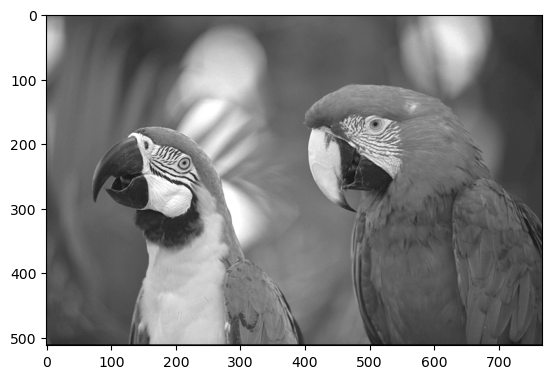

In [9]:
# cover imgPath
imgPath = 'cover-kodak-1.png'
# convert img to array 以灰階格式讀取(二維)
cover_gray = cv2.imread(imgPath ,cv2.IMREAD_GRAYSCALE)   
print(cover_gray.shape)
print(cover_gray[0].shape)
print(cover_gray)

# 轉為一維
cover_temp=cover_gray.reshape(-1,)
print(cover_temp)
print(cover_temp.shape)

# 印出圖片
plt.subplot(111)
plt.imshow(cover_gray,cmap = 'gray')
plt.show()

In [10]:
n = input("Input number of pixels in a group (n>=2 but n<= MxN):")
n=int(n)
digit_ary=2*n+1
opt_k,opt_L=optimalK(n=n,digit_ary=digit_ary)

# pixels 總數: len(cover_temp) / 一組n個 = 組數 / k digit * L(一組 L bits)
# seedSize=math.floor(len(cover_temp)/n)
seedSize=math.floor(len(cover_temp)/n/opt_k)*opt_L
print(seedSize)
np.random.seed(100)
# bitstream 0/1
secret_digit=np.random.randint(2, size=seedSize)
output_secret_txt(secret_digit=secret_digit, L=opt_L)
output_secret_txt2(secret_digit=secret_digit)

Input number of pixels in a group (n>=2 but n<= MxN):3
minLoss 0.02516808472660201
opt_k= 5 opt_L 14
366996


In [11]:
# 將 0/1 bitstream 二進制密碼 轉為 digit array:(2n+1)進制密碼
# bitstream to digit array secret
temp=[]
secretAll_arr=[]
for i in range(len(secret_digit)):
    temp.append(secret_digit[i])
    if((i+1) % opt_L==0):
        secret_arr=binary_to_digitArr(secret_digit=temp, k=opt_k, digit_ary=digit_ary)
        secretAll_arr.append(secret_arr)
        temp=[]
secretAll_arr=np.array(secretAll_arr).reshape(-1,)
# print(secretAll_arr.shape)
print(secretAll_arr)

[1 4 1 ... 6 0 0]


In [12]:
# 加密 digit array:(2n+1)進制密碼
stego_EMD=np.ndarray(cover_temp.shape, dtype=np.uint8)
index=0
for i in range(len(secretAll_arr)):
    stego_EMD[index:index+n]=embedding(n=n,digit_ary=digit_ary,cover_img=cover_temp[index:index+n],secret_digit=secretAll_arr[i])
    index+=n
print(stego_EMD)

[113 115 117 ...   0   0   0]


In [13]:
# 解密 digit array:(2n+1)進制密碼
secret_digitArray=[]
index=0
for i in range(len(secretAll_arr)):
    secret_digitArray.append(extraction(n=n, digit_ary=digit_ary,cover_img=stego_EMD[index:index+n]))
    index+=n
print("extract secret: ",secret_digitArray)

extract secret:  [1, 4, 1, 3, 1, 0, 6, 6, 3, 2, 1, 0, 2, 6, 6, 6, 5, 2, 3, 3, 2, 3, 1, 6, 5, 0, 0, 3, 3, 1, 3, 5, 5, 0, 1, 4, 3, 5, 6, 4, 4, 4, 6, 0, 5, 1, 5, 0, 3, 3, 1, 4, 2, 2, 5, 0, 4, 6, 5, 6, 6, 5, 0, 2, 3, 3, 4, 3, 3, 5, 6, 1, 2, 1, 6, 3, 4, 6, 1, 5, 0, 1, 5, 4, 6, 1, 6, 6, 2, 6, 6, 1, 4, 0, 0, 6, 0, 6, 1, 2, 2, 2, 3, 4, 5, 6, 0, 6, 5, 3, 6, 3, 6, 0, 5, 4, 1, 1, 3, 6, 5, 2, 4, 6, 2, 3, 3, 5, 2, 2, 1, 1, 2, 0, 1, 2, 1, 3, 6, 0, 3, 5, 5, 1, 2, 3, 2, 2, 2, 4, 3, 2, 2, 5, 0, 0, 4, 4, 2, 0, 1, 0, 0, 3, 0, 0, 1, 6, 6, 0, 5, 5, 4, 3, 5, 3, 5, 5, 2, 1, 2, 3, 3, 4, 0, 2, 2, 3, 2, 6, 3, 6, 0, 0, 5, 2, 3, 2, 0, 1, 4, 4, 6, 2, 6, 0, 1, 2, 6, 0, 6, 0, 1, 4, 1, 6, 4, 0, 1, 5, 1, 3, 0, 2, 6, 1, 2, 4, 3, 4, 5, 2, 1, 1, 1, 5, 2, 5, 1, 0, 5, 0, 5, 6, 3, 6, 1, 3, 5, 3, 0, 5, 3, 4, 1, 2, 1, 0, 3, 1, 6, 2, 4, 0, 5, 2, 3, 5, 0, 4, 4, 4, 3, 1, 2, 6, 1, 6, 0, 0, 3, 5, 6, 4, 2, 3, 2, 0, 4, 6, 0, 6, 3, 6, 1, 5, 5, 1, 4, 5, 2, 5, 6, 6, 4, 0, 2, 0, 0, 6, 6, 1, 4, 1, 6, 1, 0, 5, 5, 4, 4, 2, 1, 0, 0, 5, 0, 6

In [14]:
# 將 digit array:(2n+1)進制密碼 轉回 0/1 bitstream 二進制密碼
# digit array to bitstream secret
temp=[]
secret_bitArray=[]
for i in range(len(secret_digitArray)):
    temp.append(secret_digitArray[i])
    if((i+1) % opt_k==0):
        secret_bitArray.append(digitArr_to_binary(secret_digit=temp, L=opt_L, digit_ary=digit_ary))
        temp=[]
secret_bitArray=np.array(secret_bitArray).reshape(-1,)
# print(secretAll_arr.shape)
# print(secret_bitArray[:14])# [0,0,1,1,1,1,0,0,0,0,0,1,0,0]
# print(secret_bitArray[14:14+opt_L])# [0,0,1,1,1,1,0,0,0,0,0,1,0,0]

(512, 768)
[[113 115 117 ...  40  39  43]
 [117 117 119 ...  43  43  39]
 [120 120 122 ...  43  39  38]
 ...
 [ 75  74  78 ...  66  56  50]
 [ 74  74  73 ...  64  54  53]
 [  1   0   0 ...   0   0   0]]


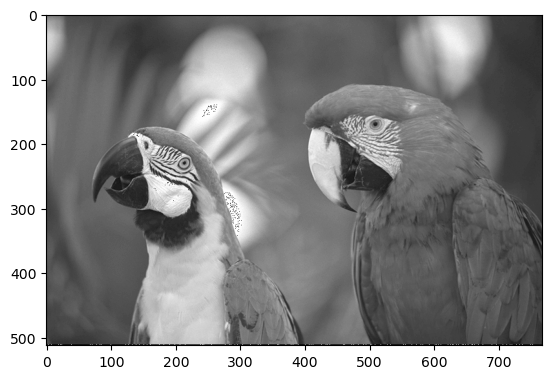

In [15]:
# 轉回二維
stego_img=stego_EMD.reshape(cover_gray.shape,)
print(stego_img.shape)
print(stego_img)

# 印出圖片
plt.subplot(111)
plt.imshow(stego_img,cmap = 'gray')
plt.show()

In [16]:
# 存顏色轉換結果圖
cv2.imwrite('stego-kodak-1_2.png', stego_img)

True

In [17]:
# cover imgPath
cover_imgPath = 'cover-kodak-1.png'
# convert img to array 以灰階格式讀取(二維)
cover_img = cv2.imread(cover_imgPath ,cv2.IMREAD_GRAYSCALE)
cover_img=cover_img.reshape(-1,)

# stego imgPath
stego_imgPath = 'stego-kodak-1_2.png'
# convert img to array 以灰階格式讀取(二維)
stego_img = cv2.imread(stego_imgPath ,cv2.IMREAD_GRAYSCALE)
stego_img=stego_img.reshape(-1,)

print(cover_img)
print(stego_img)

[114 115 117 ...   0   0   0]
[113 115 117 ...   0   0   0]


In [18]:
# MSE:distortion per pixel PSNR Cp:bpp(Embedding rate)
# MSE in n pixels:2/(2n+1)
MSE=sum((cover_img-stego_img)**2) / len(cover_img)
# PSNR 10*log(255*255/(2/(2n+1))
PSNR=10*math.log(255**2/MSE,10)
Cp=(math.floor(len(cover_img)/n/opt_k) * opt_k * opt_L) / (len(cover_img))
# Efficiency = ((2*n+1)*opt_L) / (2*n)
Efficiency=Cp/MSE
print("MSE=",MSE)
print("PSNR=",PSNR)
print("Cp=",Cp)
print("Efficiency=",Efficiency)

MSE= 0.2852935791015625
PSNR= 53.5778836345598
Cp= 4.666595458984375
Efficiency= 16.357169599400972


In [26]:
2/7

0.2857142857142857

In [25]:
PSNR=10*math.log(255**2/0.25,10)
PSNR

54.15140352195871

In [53]:
cover=np.array([9,10,10,10,10,10,12,12])
cover=cover.reshape(2,4)
print(cover)
stego=np.array([9,10,10,9,10,11,12,12])
stego=stego.reshape(2,4)
a=sum((cover-stego)**2)
sum(a)
mse= sum(sum((cover-stego)**2)) / len(cover)
cover.shape

[[ 9 10 10 10]
 [10 10 12 12]]


(2, 4)

In [26]:
digitArr_to_binary(secret_digit=[1,4,1,3,1], L=14, digit_ary=7) #14131(7)=3844(10)=[0,0,1,1,1,1,0,0,0,0,0,1,0,0](2)

reversed_arr [1 3 1 4 1]


(3844.0, array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0]))

In [86]:
binary_to_digitArr(secret_digit=[0,0,1,0,0,1,1,1,1,1,0,0,1,1], k=5, digit_ary=7)

reversed_arr [1 1 0 0 1 1 1 1 1 0 0 1 0 0]


array([1, 0, 2, 6, 6])

In [85]:
binary_to_digitArr(secret_digit=[0,0,1,0,0,1,0,1,0,0,0,1,1,1], k=5, digit_ary=7)

reversed_arr [1 1 1 0 0 0 1 0 1 0 0 1 0 0]


array([0, 6, 6, 3, 2])

In [81]:
binary_to_digitArr(secret_digit=[0,0,1,1,1,1,0,0,0,0,0,1,0,0], k=5, digit_ary=7) #3844(10)=14131(7)

reversed_arr [0 0 1 0 0 0 0 0 1 1 1 1 0 0]


array([1, 4, 1, 3, 1])

In [4]:
np.random.seed(100)
np.random.randint(2*n, size=10)

array([8, 8, 3, 7, 7, 0, 4, 2, 5, 2])

In [28]:
capacity=math.floor(3/opt_k) * opt_L
capacity

0

In [5]:
print(secret_digit[0])

8


In [30]:
math.floor(512*512/3/opt_k) * opt_k * opt_L

1223320

In [5]:
output_secret_txt(secret_digit)

In [47]:
embedding(n=4,digit_ary=9,cover_img=[14,13,9,4],secret_digit=7)

[14, 13, 9, 3]

In [54]:
embedding(n=4,digit_ary=9,cover_img=[255,255,255,254],secret_digit=0)

[254, 254, 255, 255]

In [71]:
embedding(n=4,digit_ary=9,cover_img=[1,0,0,0],secret_digit=6)

3


[2, 0, 0, 1]

In [55]:
extraction(n=4, digit_ary=9,cover_img=[254, 254, 255, 255])

0

In [72]:
extraction(n=4, digit_ary=9,cover_img=[2, 0, 0, 1])

6